In [1]:
import pandas as pd

# Load data for Paris
Paris_1 = pd.read_csv('Coding_Paris_Week1.csv')
Paris_2 = pd.read_csv('Coding_Paris_Week2.csv')
Paris_3 = pd.read_csv('Coding_Paris_Week3.csv')
Paris_4 = pd.read_csv('Coding_Paris_Week4.csv')
Paris_5 = pd.read_csv('Coding_Paris_Week5.csv')

# Load data for Shawn
Shawn_1 = pd.read_csv('Coding_Shawn_Week1.csv')
Shawn_2 = pd.read_csv('Coding_Shawn_Week2.csv')
Shawn_3 = pd.read_csv('Coding_Shawn_Week3.csv')
Shawn_4 = pd.read_csv('Coding_Shawn_Week4.csv')
Shawn_5 = pd.read_csv('Coding_Shawn_Week5.csv')

# Load data for Tianli
Tianli_1 = pd.read_csv('Coding_Tianli_Week1.csv')
Tianli_2 = pd.read_csv('Coding_Tianli_Week2.csv')
Tianli_3 = pd.read_csv('Coding_Tianli_Week3.csv')
Tianli_4 = pd.read_csv('Coding_Tianli_Week4.csv')
Tianli_5 = pd.read_csv('Coding_Tianli_Week5.csv')

# Combine all the data frames into one
combined_df = pd.concat([
    Paris_1, Paris_2, Paris_3, Paris_4, Paris_5,
    Shawn_1, Shawn_2, Shawn_3, Shawn_4, Shawn_5,
    Tianli_1, Tianli_2, Tianli_3, Tianli_4, Tianli_5
], ignore_index=True)

# Convert 'Sentiment' column to integer type
combined_df['Sentiment'] = combined_df['Sentiment'].astype(int)

In [2]:
# Split the data into training and validation sets
train_df = combined_df.sample(frac=0.8, random_state=2024)

# Create a validation set from the remaining data
validation_df = combined_df.drop(train_df.index)
validation_df = validation_df.reset_index(drop=True)

In [3]:
# Define a dictionary to map sentiment codes to their corresponding labels
sentiment_map = {
    1: 'positive',
    2: 'negative',
    3: 'neutral',
    4: 'combination'
}

# Apply the sentiment mapping to the 'Sentiment' column in the training dataframe
train_df['Sentiment'] = train_df['Sentiment'].map(sentiment_map)

In [4]:
import json

# Define the output file name
output_file = 'tweets_sentiment_finetune_1031_train.jsonl'

# Open the file in write mode and specify the encoding
with open(output_file, mode='w', encoding='utf-8') as jsonl_file:
    # Iterate through each row in the training dataframe
    for index, row in train_df.iterrows():
        # Create a JSON record for each row
        json_record = {
            "messages": [
                # System message to guide the sentiment analysis
                {"role": "system", "content": "You are a sentiment analyst."},
                # User message with the tweet content and instructions
                {"role": "user", "content": f"Evaluate the sentiment toward cultured meat that this tweet expresses: {row['Tweet']}.'\n'Return your response only as positive, negative, neutral, or combination."},
                # Assistant message with the sentiment label
                {"role": "assistant", "content": row['Sentiment']}
            ]
        }
        # Write the JSON record to the file
        jsonl_file.write(json.dumps(json_record) + '\n')

# Print a message indicating the output file name
print(f"the output file is saved as {output_file}")

the output file is saved as tweets_sentiment_finetune_1031_train.jsonl


## The training data was then uploaded to OpenAI for fine-tuning
### During this process, a unique code representing the fine-tuning job is generated. Once the fine-tuning is complete, I can use this code to access the fine-tuned model.

In [6]:
from openai import OpenAI

# Initialize the OpenAI client with the API key
# NOTE: API key has been hidden for security reasons and to comply with GitHub upload requirements
client = OpenAI(api_key="your_api_key_here")

In [8]:
#Unique code representing the fine-tuning job. 
#The "fine_tuned_model" represents the model that has been fine-tuned on our labeled data.
client.fine_tuning.jobs.retrieve("ftjob-mEg6cL5v6BTucdFypPq6U5Sp")

FineTuningJob(id='ftjob-mEg6cL5v6BTucdFypPq6U5Sp', created_at=1730414807, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-2024-08-06:personal::AOYykrAN', finished_at=1730417693, hyperparameters=Hyperparameters(n_epochs=1, batch_size=12, learning_rate_multiplier=2), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-jpYhTBnmIVRmvclaBivLf7aN', result_files=['file-oMdY3XAZu2sP6P71IzcXJI37'], status='succeeded', trained_tokens=1653993, training_file='file-DBF7HNu8x1hgnMSOTHermfNT', validation_file=None, user_provided_suffix=None, seed=2024, estimated_finish=None, integrations=[], method=None)

In [9]:
def answer(prompt):
    response = client.chat.completions.create(
        model="ft:gpt-4o-2024-08-06:personal::AOYykrAN",
        messages=[
                {"role": "system", "content": "You are a sentiment analyst."},
                {"role": "user", "content":prompt} ],
        temperature = 0
    )
    return response.choices[0].message.content.strip()

In [29]:
def feed(i,df):
    text = (f"Evaluate the sentiment toward cultured meat that this tweet expresses: {df['Tweet'][i]}.'\n'Return your response only as positive, negative, neutral, or combination.")
    return text

In [26]:
validation_df = validation_df.reset_index(drop=True)

## This process was repeated three times:

In [30]:
import time
sentiment = []
start = time.time()
count = 0
for i, v in validation_df.iterrows():
    sentiment.append(answer(feed(i,validation_df)))
    #time.sleep(15)
time_used = time.time()-start

In [31]:
time_used

2570.604232788086

In [32]:
sentiment

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'combination',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'combination',
 'combination',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative'

In [37]:
validation_df['GPT-4o'] = [i for i in sentiment]
validation_df

,Tweet,Sentiment,GPT-4o_2,GPT-4o_3,GPT-4o
0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,neutral,neutral,neutral
1,RT @ndonyourtable What's the difference betwee...,3,neutral,neutral,neutral
2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,neutral,neutral,neutral
3,This year is the first time cultivated meat ha...,3,neutral,neutral,neutral
4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,neutral,neutral,neutral
...,...,...,...,...,...
4590,@Joseph_Plant What goes into lab grown meat? I...,2,negative,negative,negative
4591,Google Funding Lab Grown Meat… No Animals Kill...,1,positive,positive,positive
4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,positive,positive,positive
4593,@MusadADroid @AuthorGusPegel The answer would ...,4,positive,positive,positive


In [38]:
# Save the validation results for the three fine-tuned GPT-4o runs to a CSV file
validation_df.to_csv('finetuned_20241106.csv')

In [4]:
# Load the validation results for the three fine-tuned GPT-4o runs from a CSV file
validation_df = pd.read_csv('finetuned_20241106.csv')

In [5]:
sentiment_map = {
     'positive': '1',
    'negative':'2',
    'neutral':'3',
    'combination': '4'
}

validation_df['GPT-4o'] = validation_df['GPT-4o'].map(sentiment_map).fillna(0).astype(int)
validation_df['GPT-4o_2'] = validation_df['GPT-4o_2'].map(sentiment_map).fillna(0).astype(int)
validation_df['GPT-4o_3'] = validation_df['GPT-4o_3'].map(sentiment_map).fillna(0).astype(int)

In [6]:
validation_df

,Unnamed: 0,Tweet,Sentiment,GPT-4o_2,GPT-4o_3,GPT-4o
0,0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,3,3,3
1,1,RT @ndonyourtable What's the difference betwee...,3,3,3,3
2,2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,3,3,3
3,3,This year is the first time cultivated meat ha...,3,3,3,3
4,4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,3,3,3
...,...,...,...,...,...,...
4590,4590,@Joseph_Plant What goes into lab grown meat? I...,2,2,2,2
4591,4591,Google Funding Lab Grown Meat… No Animals Kill...,1,1,1,1
4592,4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,1,1,1
4593,4593,@MusadADroid @AuthorGusPegel The answer would ...,4,1,1,1


In [7]:
#Intra-coder reliability was calculated:
import krippendorff
import pandas as pd

# Select only the relevant columns for Krippendorff's alpha calculation
data = validation_df[['GPT-4o', 'GPT-4o_2', 'GPT-4o_3']].values.T

# Calculate Krippendorff's alpha
alpha = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')

print(f"Krippendorff's alpha: {alpha}")

Krippendorff's alpha: 0.9907588482725249


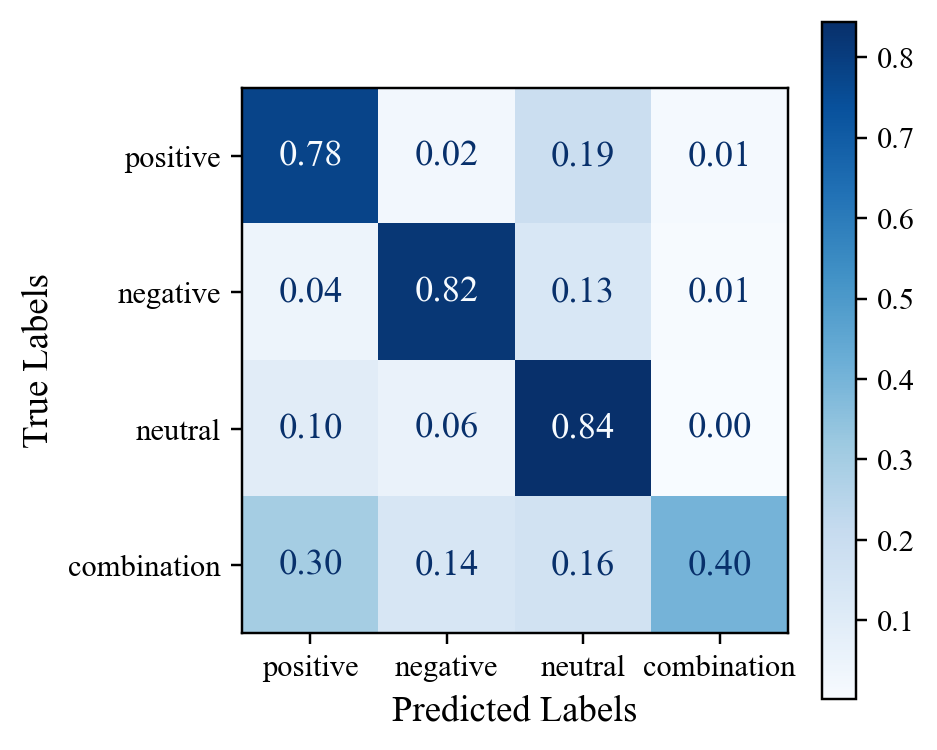

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define a mapping of numeric labels to sentiment labels
label_mapping = {0: 'positive', 1: 'negative', 2: 'neutral', 3: 'combination'}
sentiment_labels = [label_mapping[i] for i in range(4)]  # List of sentiment labels in order

# Generate normalized confusion matrices for each run
conf_matrix1 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number'], 
    normalize='true'
)
conf_matrix2 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number_2'], 
    normalize='true'
)
conf_matrix3 = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_number_3'], 
    normalize='true'
)

# Calculate the mean normalized confusion matrix
mean_conf_matrix = (conf_matrix1 + conf_matrix2 + conf_matrix3) / 3

# Create a ConfusionMatrixDisplay object for visualization, with customized labels
disp = ConfusionMatrixDisplay(confusion_matrix=mean_conf_matrix, display_labels=sentiment_labels)

# Plot the mean normalized confusion matrix
plt.rc('font', family='Times New Roman')  # Set the font to Times New Roman
fig, ax = plt.subplots(figsize=(4, 4), dpi=220)  # Increase figure size and resolution
disp.plot(cmap='Blues', ax=ax, values_format=".2f")  # Format numbers as percentages with two decimals

# Customize the text size of numbers in the matrix
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Increase font size of numbers in the matrix

# Set titles and labels with the desired font
plt.xlabel("Predicted Labels", fontname='Times New Roman', fontsize=12)
plt.ylabel("True Labels", fontname='Times New Roman', fontsize=12)
#plt.title("Mean Normalized Confusion Matrix Across 3 Runs", fontname='Times New Roman', fontsize=14)
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_number'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_number'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_number'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_number'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8150163220892275
Precision: 0.8245920680858578
Recall: 0.8150163220892275
F1 Score: 0.8170824861416164


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_2'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_2'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_2'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_2'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8171926006528836
Precision: 0.826777844610985
Recall: 0.8171926006528836
F1 Score: 0.8192700470927687


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['GPT-4o_3'])
precision = precision_score(validation_df['Sentiment'], validation_df['GPT-4o_3'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['GPT-4o_3'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['GPT-4o_3'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8152339499455931
Precision: 0.825001979064404
Recall: 0.8152339499455931
F1 Score: 0.8174058757685798
